In [131]:
import os
import pickle
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import timedelta, datetime
import matplotlib.cm as cm
import numpy as np
import scipy
import netCDF4

In [132]:
def gridbox_area(lat):
    #111km * 111km * 0.5 * 0.625 * cos(lat)
    return (3850.3125 * 1000 * 1000 * np.cos(np.deg2rad(lat)))

In [133]:
with open(f"East Coast/prec_blobs_east_2010.pkl", 'rb') as f:
    BC = pickle.load(f)
with open(f"East Coast/prec_blobs_east_2011.pkl", 'rb') as f:
    BC2 = pickle.load(f)

In [134]:
#20110110000615026700
#20110126120540028350

for item in BC2:
    if (item[0:6] == '201101'):
        print (item)

20110115060420027300
20110117180615028050
20110105120585026850
20110120180525027750
20110102120465029100
20110126120540028350
20110110000615026700
20110128060555028650
20110107180525028050
20110126180345024750
20110107180495028500
20110117060585026550
20110102060525028050
20110130000465029250
20110122060630028350
20110127060360027000


In [135]:
#list(BC.keys()) <- get list of storm IDs
stormid = '20101225060615026700'
stormid2 = '20110110000615026700'
stormid3 = '20110126120540028350'
stormdata = BC[stormid]
stormdata2 = BC2[stormid2]
stormdata3 = BC2[stormid3]

In [136]:
stormdata_w = dict(stormdata)
stormdata_w2 = dict(stormdata2)
stormdata_w3 = dict(stormdata3)
stormdata_areas = dict(stormdata)
stormdata_areas2 = dict(stormdata2)
stormdata_areas3 = dict(stormdata3)

for item in stormdata_w:
    stormdata_w[item] = stormdata_w[item] * gridbox_area(stormdata_w[item]['lat'])
    stormdata_areas[item] = stormdata_areas[item] / stormdata_areas[item] * gridbox_area(stormdata_areas[item]['lat'])

for item in stormdata_w2:
    stormdata_w2[item] = stormdata_w2[item] * gridbox_area(stormdata_w2[item]['lat'])
    stormdata_areas2[item] = stormdata_areas2[item] / stormdata_areas2[item] * gridbox_area(stormdata_areas2[item]['lat'])

for item in stormdata_w3:
    stormdata_w3[item] = stormdata_w3[item] * gridbox_area(stormdata_w3[item]['lat'])
    stormdata_areas3[item] = stormdata_areas3[item] / stormdata_areas3[item] * gridbox_area(stormdata_areas3[item]['lat'])

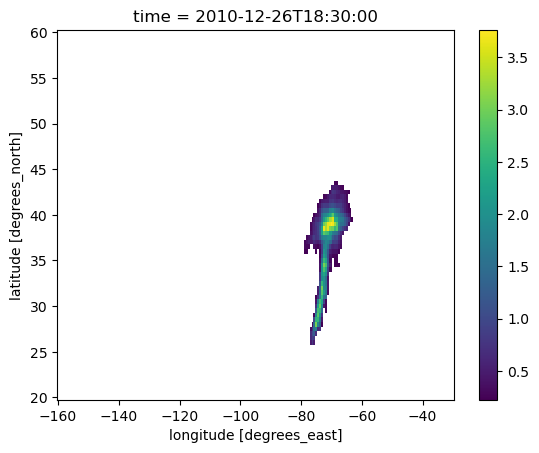

In [137]:
stormdata[list(stormdata.keys())[6]].plot()

In [138]:
stormdata[list(stormdata.keys())[6]][42][138]

<xarray.DataArray ()> Size: 4B
array(0.39246082, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2010-12-26T18:30:00
    lon      float64 8B -73.75
    lat      float64 8B 41.0

In [155]:
stormtotal_nyc_metro = np.zeros(len(stormdata))
i = 0
for item in stormdata:
    stormtotal_nyc_metro[i] = float(stormdata[item][40:45, 136:141].sum()) / 25
    i+=1
#stormdata[list(stormdata.keys())[8]][40:45, 136:141]

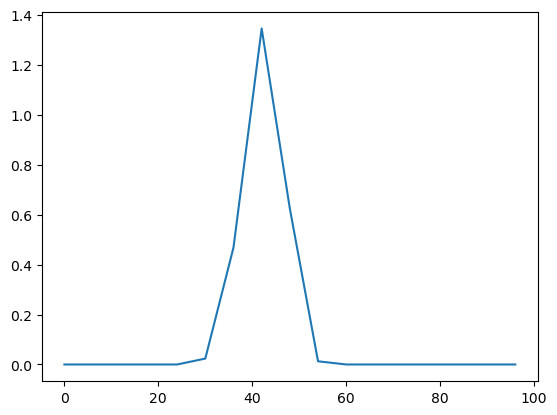

In [156]:
hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
plt.plot(hours, stormtotal_nyc_metro)

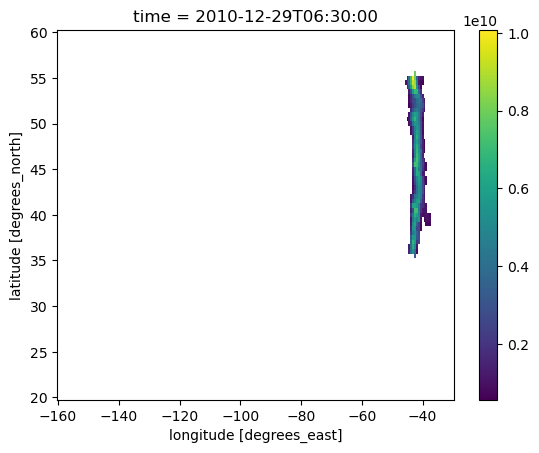

In [164]:
stormdata_w[list(stormdata_w.keys())[16]].plot()

In [142]:
stormtotal_kghr = np.zeros(len(stormdata_w))
stormtotal_mmhr = np.zeros(len(stormdata_w))
i = 0
for item in stormdata_w:
    stormtotal_kghr[i] = float(stormdata_w[item].sum())
    stormtotal_mmhr[i] = float(stormdata_w[item].sum()) / float(stormdata_areas[item].sum())
    i+=1

stormtotal_kghr2 = np.zeros(len(stormdata_w2))
stormtotal_mmhr2 = np.zeros(len(stormdata_w2))
i = 0
for item in stormdata_w2:
    stormtotal_kghr2[i] = float(stormdata_w2[item].sum())
    stormtotal_mmhr2[i] = float(stormdata_w2[item].sum()) / float(stormdata_areas2[item].sum())
    i+=1

stormtotal_kghr3 = np.zeros(len(stormdata_w3))
stormtotal_mmhr3 = np.zeros(len(stormdata_w3))
i = 0
for item in stormdata_w3:
    stormtotal_kghr3[i] = float(stormdata_w3[item].sum())
    stormtotal_mmhr3[i] = float(stormdata_w3[item].sum()) / float(stormdata_areas3[item].sum())
    i+=1

In [143]:
with open(f"East Coast/east_ETCs_2010.pkl", 'rb') as f:
    eastETC = pickle.load(f)

In [144]:
eastETC[35]

{'storm_id': '20101225060615026700',
 'storm_files': ['MERRA2fronts_20101225_06_28.21_-93.32_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101225_12_28.47_-91.07_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101225_18_28.74_-88.05_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101226_00_29.49_-84.54_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101226_06_30.43_-81.01_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101226_12_33.22_-76.58_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101226_18_36.55_-73.33_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101227_00_39.07_-71.74_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101227_06_40.61_-70.89_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101227_12_41.67_-69.54_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101227_18_42.35_-67.59_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101228_00_43.40_-65.08_ocean_20101225060615026700.ncdf',
  'MERRA2fronts_20101228_06_44.93_-62.46_land_20

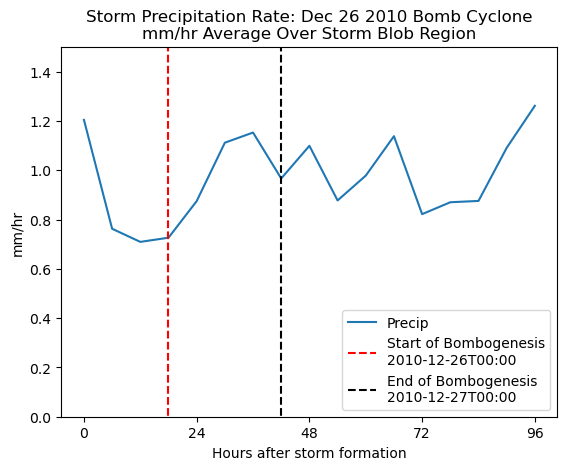

In [145]:
hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
x1 = [18,18.001]
y1 = [-100,100]
x2 = [42,42.001]
plt.plot(hours, stormtotal_mmhr, label="Precip")
plt.plot(x1,y1,linestyle="dashed",color="red",label="Start of Bombogenesis\n2010-12-26T00:00")
plt.plot(x2,y1,linestyle="dashed",color="black",label="End of Bombogenesis\n2010-12-27T00:00")
plt.ylim((0,1.5))
plt.xticks((0,24,48,72,96))
plt.legend()
plt.title("Storm Precipitation Rate: Dec 26 2010 Bomb Cyclone\nmm/hr Average Over Storm Blob Region")
plt.xlabel("Hours after storm formation")
plt.ylabel("mm/hr")
plt.savefig("figures/Dec26BCprecipRate.png")

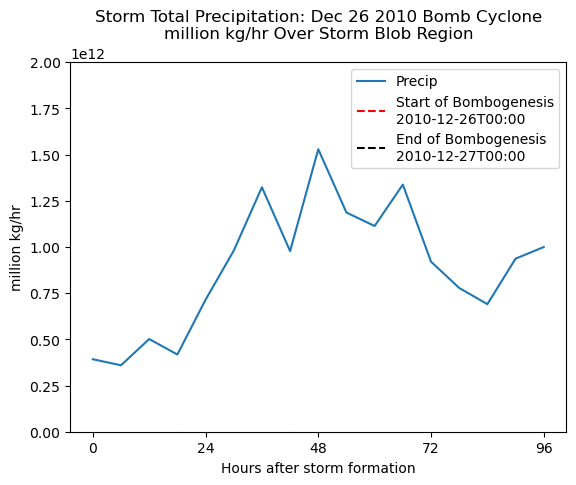

In [148]:
hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
x1 = [18,18.001]
y1 = [-100000000,100000000]
x2 = [42,42.001]

plt.plot(hours, stormtotal_kghr, label="Precip")
plt.plot(x1,y1,linestyle="dashed",color="red",label="Start of Bombogenesis\n2010-12-26T00:00")
plt.plot(x2,y1,linestyle="dashed",color="black",label="End of Bombogenesis\n2010-12-27T00:00")
plt.ylim((0,2000000000000))
plt.xticks((0,24,48,72,96))
plt.legend()
plt.title("Storm Total Precipitation: Dec 26 2010 Bomb Cyclone\nmillion kg/hr Over Storm Blob Region")
plt.xlabel("Hours after storm formation")
plt.ylabel("million kg/hr")
plt.savefig("figures/Dec26BCprecipOverRegion.png")

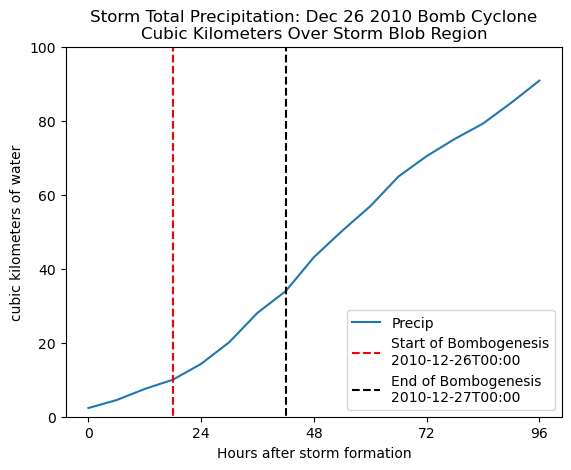

In [154]:
stormtotal_kgtotal = np.zeros(len(stormtotal_kghr))
for i in range(len(stormtotal_kghr) - 1, -1, -1):
    stormtotal_kgtotal[i] = stormtotal_kghr[0:i+1].sum() * 6 / 1000000000000

hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
x1 = [18,18.001]
y1 = [-100000000,100000000]
x2 = [42,42.001]

plt.plot(hours, stormtotal_kgtotal, label="Precip")
plt.plot(x1,y1,linestyle="dashed",color="red",label="Start of Bombogenesis\n2010-12-26T00:00")
plt.plot(x2,y1,linestyle="dashed",color="black",label="End of Bombogenesis\n2010-12-27T00:00")
plt.ylim((0,100))
plt.xticks((0,24,48,72,96))
plt.legend()
plt.title("Storm Total Precipitation: Dec 26 2010 Bomb Cyclone\nCubic Kilometers Over Storm Blob Region")
plt.xlabel("Hours after storm formation")
plt.ylabel("cubic kilometers of water")
plt.savefig("figures/Dec26BCprecipOverRegionCumulative.png")

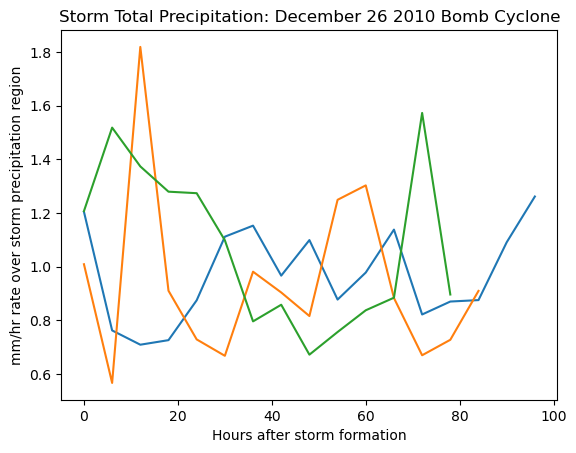

In [117]:
hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
hours2 = np.arange(0,len(stormtotal_kghr2) * 6, 6)
hours3 = np.arange(0,len(stormtotal_kghr3) * 6, 6)

plt.plot(hours, stormtotal_mmhr, label="Dec 26 2010")
plt.plot(hours2, stormtotal_mmhr2, label="Jan 11 2011")
plt.plot(hours3, stormtotal_mmhr3, label="Jan 27 2011")
plt.title("Storm Total Precipitation: December 26 2010 Bomb Cyclone")
plt.xlabel("Hours after storm formation")
plt.ylabel("mm/hr rate over storm precipitation region")
plt.savefig("figures/3StormBCprecipRate.png")

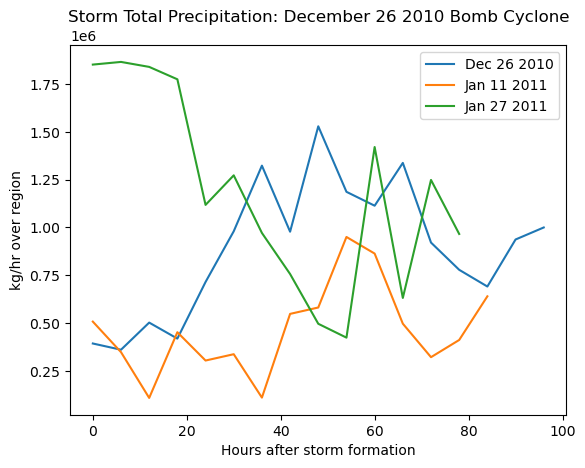

In [118]:
hours = np.arange(0,len(stormtotal_kghr) * 6, 6)
hours2 = np.arange(0,len(stormtotal_kghr2) * 6, 6)
hours3 = np.arange(0,len(stormtotal_kghr3) * 6, 6)

plt.plot(hours, stormtotal_kghr, label="Dec 26 2010")
plt.plot(hours2, stormtotal_kghr2, label="Jan 11 2011")
plt.plot(hours3, stormtotal_kghr3, label="Jan 27 2011")
plt.title("Storm Total Precipitation: December 26 2010 Bomb Cyclone")
plt.xlabel("Hours after storm formation")
plt.ylabel("kg/hr over region")
plt.legend()
plt.savefig("figures/3StormBCprecipOverRegion.png")

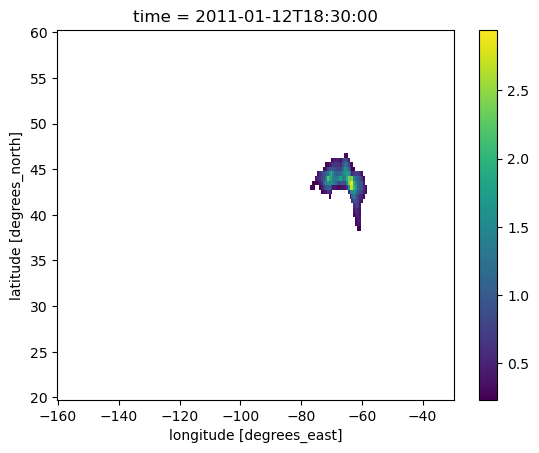

In [119]:
frame = 11
stormdata2[list(stormdata2.keys())[frame]].plot()
plt.savefig(f"figures/20110111stormFrame{frame}.png")

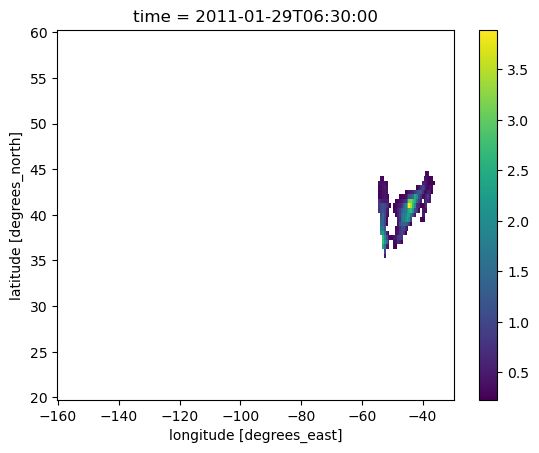

In [120]:
frame = 11
stormdata3[list(stormdata3.keys())[frame]].plot()
plt.savefig(f"figures/20110126stormFrame{frame}.png")